In [15]:
using Pkg #activate the Julia project in the main git repository
Pkg.activate("..")
using Plots, PhasorNetworks, Random, DifferentialEquations #import the libraries (this cell takes ~30 s. to execute)

  Activating project at `~/code/PhasorNetworks.jl`


# Oscillators and Waves

In the previous notebook, we introduced several concepts: encoding information into phase, representation of phase values by waves in time, and computing the similarity between large collections of phase values. Let's now concentrate on one aspect of this: representing phase via waves.

Oscillators are physical, self-driving systems which can generate waveforms. In many ways, biological neurons can be interpreted as oscillators: they utilize chemical sources of energy and - via internal and external currents - go through regular, cyclic changes in cellular potential. This connection was the driving force behind the "resonate-and-fire" (or Izhikevich) neuron, which codifies the behavior of a neuron into a simple, oscillatory system:

$$ \frac{dU}{dt} = (k + i \omega) \cdot U + I(t) $$

Where $U$ is a complex-valued potential (it has both real and imaginary components, corresponding to the neuron's current and voltage, respectively). $\omega$ is the angular frequency of the neuron, and $k$ is the leakage. Let's look at an example of how a resonate-and-fire (R&F) neuron behaves:

In [58]:
# define a leakage value
k = -0.3
# an angular frequency
ω = 2π
# and a current function which provides an impulse once each period
I(t) = mod(t, 1.0) < 0.05

I (generic function with 1 method)

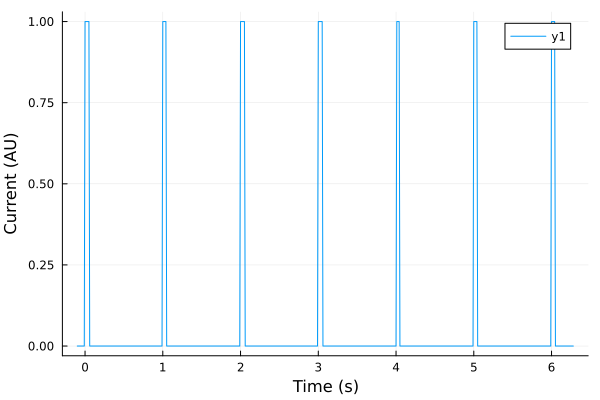

In [59]:
ts = -0.1:0.01:2π
plot(ts, I.(ts))
xlabel!("Time (s)")
ylabel!("Current (AU)")

In [60]:
# declare the differential equation we're going to solve
dzdt(u,p,t) = (k + 1im * ω) * u + I(t)
# and the initial potential of the neuron (zero)
u0 = ComplexF32(0.0)
# as well as the time we're going to solve over - 0 to 10 seconds.
tspan = (0.0, 10.0)
# setup the ODE problem
prob = ODEProblem(dzdt, u0, tspan)
# the solver arguments
solver_args = Dict(:dt => 0.01f0,
                    :adaptive => false,
                    :save_start => true)
# and pass it to the differential equation solver
sol = solve(prob, Tsit5(); solver_args...);

[ Info: Saved animation to /Users/wilkie/code/PhasorNetworks.jl/tutorial/R&F animation.gif


Plots.AnimatedGif("/Users/wilkie/code/PhasorNetworks.jl/tutorial/R&F animation.gif")
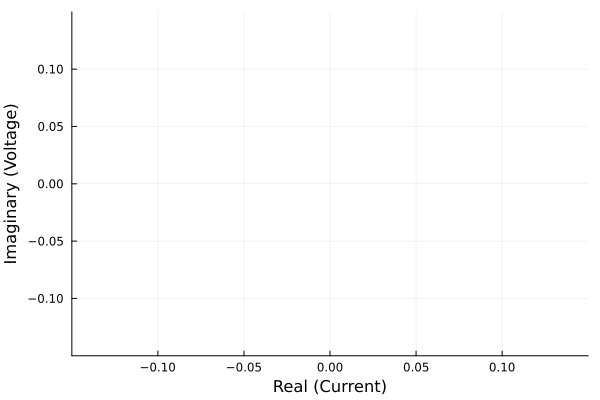

In [68]:
tbase = 0.0:0.05:6.0
anim = @animate for t in tbase
    sample = sol.(0.0:0.01:t)
    plot(real.(sample), imag.(sample), ylim=(-0.15, 0.15), xlim=(-0.15, 0.15),legend=false)
    xlabel!("Real (Current)")
    ylabel!("Imaginary (Voltage)")
end
gif(anim, "R&F animation.gif", fps=20)

[ Info: Saved animation to /Users/wilkie/code/PhasorNetworks.jl/tutorial/R&F animation 2.gif


Plots.AnimatedGif("/Users/wilkie/code/PhasorNetworks.jl/tutorial/R&F animation 2.gif")
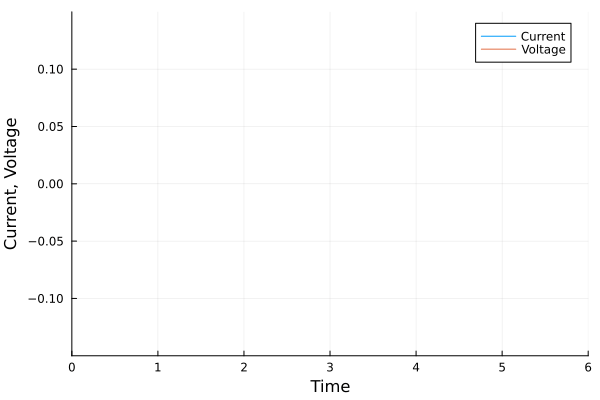

In [72]:
anim = @animate for t in tbase
    tbase_sample = 0.0:0.01:t
    sample = sol.(0.0:0.01:t)
    plot(tbase_sample, real.(sample), ylim=(-0.15, 0.15), xlim=(0.0, tbase[end]), label="Current")
    plot!(tbase_sample, imag.(sample), ylim=(-0.15, 0.15), xlim=(0.0, tbase[end]), label="Voltage")
    xlabel!("Time")
    ylabel!("Current, Voltage")
end
gif(anim, "R&F animation 2.gif", fps=20)

In [ ]:
# todo - shift offset, what does the phase look like?
# todo - now, how do we measure phase? interference
# trig algorithm
# wow now we can calculate this similarity using oscillators!
# redo the experiment this way...